* 데이터 수집      
https://data.seoul.go.kr/dataList/5/literacyView.do

In [1]:
import pandas as pd

In [2]:
# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 필요한 패키지와 라이브러리 가져온다.
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

# 폰트 지정하기
plt.rcParams['font.family'] = 'gulim'

# 데이터 확인 및 전처리

## 2021년 공공자전거 대여이력 정보

### 데이터프레임 생성/확인

In [3]:
df1 = pd.read_csv('test_data/공공자전거 대여이력 정보_2021.01.csv', encoding='cp949', low_memory=False)
df2 = pd.read_csv('test_data/공공자전거 대여이력 정보_2021.02.csv', encoding='cp949', low_memory=False)
df3 = pd.read_csv('test_data/공공자전거 대여이력 정보_2021.03.csv', encoding='cp949', low_memory=False)
df4 = pd.read_csv('test_data/공공자전거 대여이력 정보_2021.04.csv', encoding='cp949', low_memory=False)
df5 = pd.read_csv('test_data/공공자전거 대여이력 정보_2021.05.csv', encoding='cp949', low_memory=False)
df6 = pd.read_csv('test_data/공공자전거 대여이력 정보_2021.06.csv', encoding='cp949', low_memory=False)

In [ ]:
df6.head(2)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-30385,2021-05-31 23:07:00,3571,화양 APT(횡단보도 옆),0,2021-06-01 00:00:00,03538,서울숲 IT캐슬,0,53.0,2502.8
1,SPB-46321,2021-05-31 23:37:19,1911,구로디지털단지역 앞,0,2021-06-01 00:00:02,01843,독산고등학교,0,22.0,1630.0


### 데이터 연결/확인
* concat

In [4]:
# concat
df = pd.concat([df1,df2,df3,df4,df5,df6])

In [5]:
# head
df.head(2)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-53145,2021-01-02 20:50:36,3,중랑센터,0,2021-01-02 21:15:41,668,서울축산농협(장안지점),0,25.0,0.0
1,SPB-53074,2021-01-04 16:02:12,3,중랑센터,0,2021-01-04 16:17:06,668,서울축산농협(장안지점),0,14.0,0.0


In [6]:
#tail
df.tail(2)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
3445942,SPB-41691,2021-06-30 22:11:14,2220,반포본동 주민센터 앞,0,2021-07-01 04:55:29,02526,반포경남쇼핑 앞,0,404.0,0.00
3445943,SPB-52274,2021-06-30 22:12:10,2220,반포본동 주민센터 앞,0,2021-07-01 04:55:30,02526,반포경남쇼핑 앞,0,403.0,4541.22


In [7]:
# 데이터 크기
df.shape

(13613873, 11)

In [8]:
df.size # 전체셀 개수

149752603

In [9]:
# 데이터 정보(사용메모리)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13613873 entries, 0 to 3445943
Data columns (total 11 columns):
 #   Column    Dtype  
---  ------    -----  
 0   자전거번호     object 
 1   대여일시      object 
 2   대여 대여소번호  int64  
 3   대여 대여소명   object 
 4   대여거치대     object 
 5   반납일시      object 
 6   반납대여소번호   object 
 7   반납대여소명    object 
 8   반납거치대     int64  
 9   이용시간      float64
 10  이용거리      float64
dtypes: float64(2), int64(2), object(7)
memory usage: 1.2+ GB


## 데이터 전처리

### 불필요한 컬럼 제거

In [10]:
# 자전거번호, 대여거치대, 반납거치대 제거
df.drop(columns=['자전거번호', '대여거치대', '반납거치대'], inplace=True, axis=1)

In [11]:
df.shape

(13613873, 8)

### 자료형 확인/변경

In [12]:
# 자료형 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13613873 entries, 0 to 3445943
Data columns (total 8 columns):
 #   Column    Dtype  
---  ------    -----  
 0   대여일시      object 
 1   대여 대여소번호  int64  
 2   대여 대여소명   object 
 3   반납일시      object 
 4   반납대여소번호   object 
 5   반납대여소명    object 
 6   이용시간      float64
 7   이용거리      float64
dtypes: float64(2), int64(1), object(5)
memory usage: 934.8+ MB


In [13]:
# 카테고리형으로 변경  :    대여 대여소번호, 반납대여소번호
df['대여 대여소번호'] = df['대여 대여소번호'].astype('category')
df['반납대여소번호'] = df['반납대여소번호'].astype('category')

In [14]:
# 메모리 용량 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13613873 entries, 0 to 3445943
Data columns (total 8 columns):
 #   Column    Dtype   
---  ------    -----   
 0   대여일시      object  
 1   대여 대여소번호  category
 2   대여 대여소명   object  
 3   반납일시      object  
 4   반납대여소번호   category
 5   반납대여소명    object  
 6   이용시간      float64 
 7   이용거리      float64 
dtypes: category(2), float64(2), object(4)
memory usage: 779.2+ MB


In [15]:
# datetime형으로 변경 : 대여일시,반납일시
df['대여일시'] = pd.to_datetime(df['대여일시'])
df['반납일시'] = pd.to_datetime(df['반납일시'], errors='coerce')

In [16]:
# erros 오류 = 1. 무시, 2. 상승, 3. 강제  default가 상승
# raise 인경우 잘못된 구문 분석은 예외를 발생시킨다.
# coerce 잘못된 구문 분석이 NaT로 설정
# ignore  무시

In [17]:
# 자료형 변경 확인
df.dtypes

대여일시        datetime64[ns]
대여 대여소번호          category
대여 대여소명             object
반납일시        datetime64[ns]
반납대여소번호           category
반납대여소명              object
이용시간               float64
이용거리               float64
dtype: object

## 결측치 확인/처리

In [18]:
# 결측치 확인
df.isnull().sum()

대여일시          0
대여 대여소번호      0
대여 대여소명       0
반납일시        146
반납대여소번호       0
반납대여소명        0
이용시간          0
이용거리        269
dtype: int64

In [19]:
# 결측치 제거
df = df.dropna() # df.dropna(inplace=True)

In [20]:
# 결측치 확인
df.isnull().sum()

대여일시        0
대여 대여소번호    0
대여 대여소명     0
반납일시        0
반납대여소번호     0
반납대여소명      0
이용시간        0
이용거리        0
dtype: int64

# 일별 이용 현황

## 대여날짜 컬럼 추가
* date

In [21]:
df['대여날짜'] = df['대여일시'].dt.date

In [22]:
df.head(2)

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,대여날짜
0,2021-01-02 20:50:36,3,중랑센터,2021-01-02 21:15:41,668,서울축산농협(장안지점),25.0,0.0,2021-01-02
1,2021-01-04 16:02:12,3,중랑센터,2021-01-04 16:17:06,668,서울축산농협(장안지점),14.0,0.0,2021-01-04


## 대여날짜 별 대여 건수
* groupby
* to_frame

In [63]:
# 대여날짜 별 대여건수 추출
df_count = df.groupby('대여날짜').대여일시.count().to_frame()
df_count

,대여일시
대여날짜,
2021-01-01,22119
2021-01-02,23463
2021-01-03,21656
2021-01-04,32732
2021-01-05,28819
...,...
2021-06-26,105414
2021-06-27,92486
2021-06-28,105882


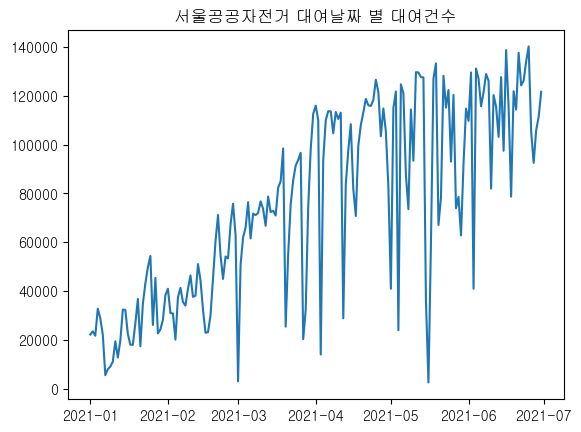

In [24]:
# 대여날짜 별 대여건수 시각화
plt.plot(df_count.index, df_count.values)
plt.title('서울공공자전거 대여날짜 별 대여건수')
plt.show()

## 대여날짜 별 이용시간
* groupby
* to_frame

In [25]:
# 대여날짜 별 이용시간 추출
df_time = df.groupby('대여날짜')['이용시간'].sum().to_frame()
df_time

,이용시간
대여날짜,
2021-01-01,692309.0
2021-01-02,686580.0
2021-01-03,609571.0
2021-01-04,750721.0
2021-01-05,610227.0
...,...
2021-06-26,3168288.0
2021-06-27,2706168.0
2021-06-28,2405249.0


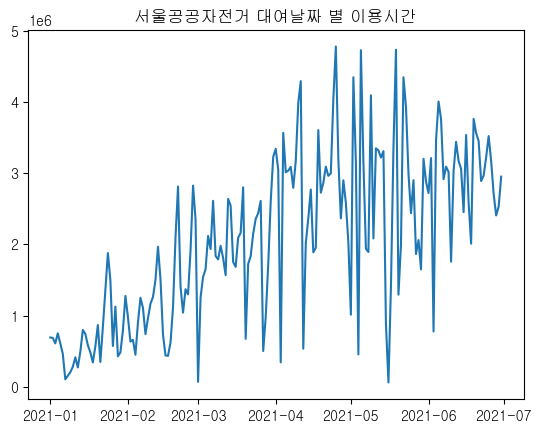

In [26]:
# 대여날짜 별 이용시간 시각화
plt.plot(df_time.index, df_time.values)
plt.title('서울공공자전거 대여날짜 별 이용시간')
plt.show()

## 대여날짜 별 이용 거리

In [27]:
# 대여날짜 별 이용거리 추출
df_distance = df.groupby('대여날짜')['이용거리'].sum().to_frame()
df_distance

,이용거리
대여날짜,
2021-01-01,4.613529e+07
2021-01-02,4.409618e+07
2021-01-03,4.059830e+07
2021-01-04,5.249645e+07
2021-01-05,6.944856e+07
...,...
2021-06-26,3.635015e+08
2021-06-27,3.078146e+08
2021-06-28,2.828124e+08


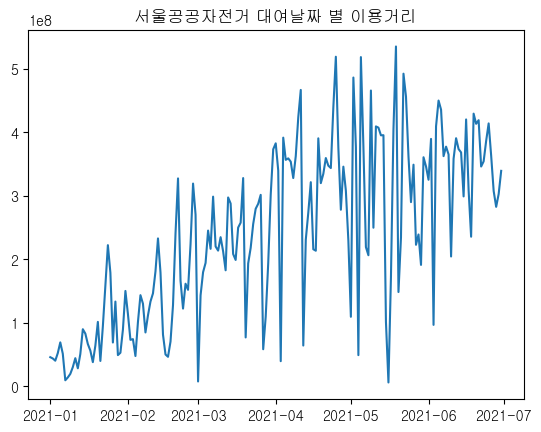

In [28]:
# 대여날짜 별 이용거리 시각화
plt.plot(df_distance.index, df_distance.values)
plt.title('서울공공자전거 대여날짜 별 이용거리')
plt.show()

## 데이터프레임 합치기

In [29]:
df_date = pd.concat([df_time, df_distance, df_count], axis=1)
df_date

,이용시간,이용거리,대여일시
대여날짜,,,
2021-01-01,692309.0,4.613529e+07,22119
2021-01-02,686580.0,4.409618e+07,23463
2021-01-03,609571.0,4.059830e+07,21656
2021-01-04,750721.0,5.249645e+07,32732
2021-01-05,610227.0,6.944856e+07,28819
...,...,...,...
2021-06-26,3168288.0,3.635015e+08,105414
2021-06-27,2706168.0,3.078146e+08,92486
2021-06-28,2405249.0,2.828124e+08,105882


# 시간대별 대여/반납 현황

## 대여시간, 반납시간 컬럼 추가

In [30]:
df['대여시간'] = df['대여일시'].dt.hour

In [31]:
df['반납시간'] = df['반납일시'].dt.hour

In [32]:
df.dtypes

대여일시        datetime64[ns]
대여 대여소번호          category
대여 대여소명             object
반납일시        datetime64[ns]
반납대여소번호           category
반납대여소명              object
이용시간               float64
이용거리               float64
대여날짜                object
대여시간                 int32
반납시간                 int32
dtype: object

In [33]:
df.head()

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,대여날짜,대여시간,반납시간
0,2021-01-02 20:50:36,3,중랑센터,2021-01-02 21:15:41,668,서울축산농협(장안지점),25.0,0.00,2021-01-02,20,21
1,2021-01-04 16:02:12,3,중랑센터,2021-01-04 16:17:06,668,서울축산농협(장안지점),14.0,0.00,2021-01-04,16,16
2,2021-01-13 21:02:05,3,중랑센터,2021-01-13 21:14:04,668,서울축산농협(장안지점),11.0,1853.99,2021-01-13,21,21
3,2021-01-14 21:02:55,3,중랑센터,2021-01-14 21:13:41,668,서울축산농협(장안지점),10.0,0.00,2021-01-14,21,21
4,2021-01-18 18:02:08,3,중랑센터,2021-01-18 18:15:22,540,군자역 7번출구 베스트샵 앞,13.0,2291.05,2021-01-18,18,18


## 시간대별 대여/반납 현황

In [38]:
# 시간대별 대여현황
s_rental = df['대여시간'].value_counts()
s_rental

대여시간
18    1432779
17    1178279
19     984476
16     934211
20     825031
15     816040
8      808506
21     770378
14     725175
13     667237
22     643611
12     623065
11     537810
9      499995
7      486775
10     438084
23     341859
0      240025
6      188920
1      158905
2      103629
5       84713
3       68710
4       55391
Name: count, dtype: int64

In [39]:
# 시간대별 반납현황
s_return = df['반납시간'].value_counts()
s_return

반납시간
18    1437723
19    1125447
17    1097623
16     880629
20     864644
8      817076
21     812357
22     768302
15     749940
14     657826
13     628908
12     591577
9      499033
11     470053
23     447477
10     402350
7      389007
0      290169
1      190954
6      152003
2      125912
3       80243
5       73983
4       60368
Name: count, dtype: int64

## 시각화

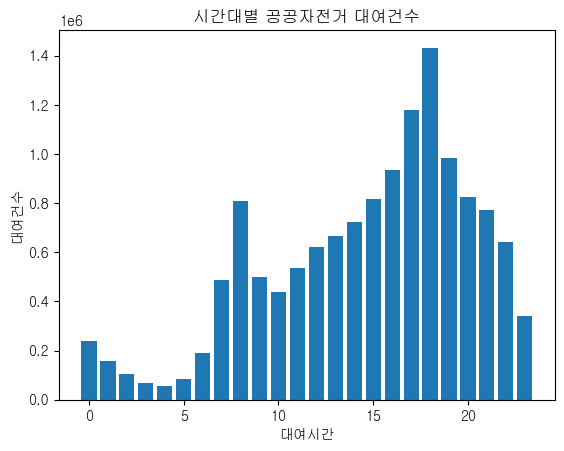

In [41]:
# 시간대별 공공자전거 대여건수 시각화
s_rental = s_rental.sort_index()
x = s_rental.index
y = s_rental.values
plt.bar(x,y)
plt.title('시간대별 공공자전거 대여건수')
plt.xlabel('대여시간')
plt.ylabel('대여건수')
plt.show()

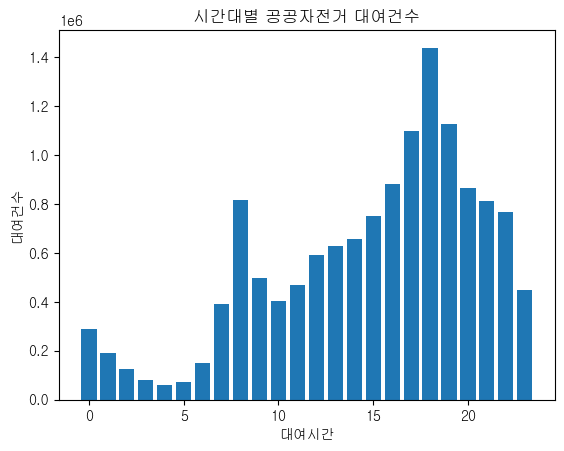

In [96]:
# 시간대별 공공자전거 반납건수 시각화
s_return = s_return.sort_index()
x = s_return.index
y = s_return.values
plt.bar(x,y)
plt.title('시간대별 공공자전거 대여건수')
plt.xlabel('대여시간')
plt.ylabel('대여건수')
plt.show()

# 대여소별 대여/반납 현황

## 대여소 현황

In [43]:
# 대여 대여소번호 갯수
df['대여 대여소번호']

0             3
1             3
2             3
3             3
4             3
           ... 
3445939     152
3445940     152
3445941     152
3445942    2220
3445943    2220
Name: 대여 대여소번호, Length: 13613604, dtype: category
Categories (2493, int64): [3, 5, 10, 101, ..., 9999, 88888, 99997, 99999]

In [44]:
# 반납대여소번호 갯수
df['반납대여소번호']

0            668
1            668
2            668
3            668
4            540
           ...  
3445939    00126
3445940    00437
3445941    00437
3445942    02526
3445943    02526
Name: 반납대여소번호, Length: 13613604, dtype: category
Categories (4811, object): [3, 10, 101, 102, ..., '화랑대역 2번출구 앞', '휘경sk뷰아파트 앞', '휘경여중고삼거리', '흑석역 4번출구']

In [50]:
# 반납대여소 번호 처리 (str형으로 변환)
df['반납대여소번호'] = df['반납대여소번호'].astype('str')

In [52]:
# 반납대여소 번호 처리 (왼쪽의 '0' 제거)
df['반납대여소번호']= df['반납대여소번호'].str.lstrip('0')

In [55]:
# 반납대여소 번호 처리 (int형으로 변환)
df['반납대여소번호']=df['반납대여소번호'].astype('int')
df.dtypes

대여일시        datetime64[ns]
대여 대여소번호          category
대여 대여소명             object
반납일시        datetime64[ns]
반납대여소번호              int32
반납대여소명              object
이용시간               float64
이용거리               float64
대여날짜                object
대여시간                 int32
반납시간                 int32
반납대여소               object
dtype: object

In [57]:
# 반납대여소 번호 처리 (category형으로 변환)
df['반납대여소번호']=df['반납대여소번호'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13613604 entries, 0 to 3445943
Data columns (total 12 columns):
 #   Column    Dtype         
---  ------    -----         
 0   대여일시      datetime64[ns]
 1   대여 대여소번호  category      
 2   대여 대여소명   object        
 3   반납일시      datetime64[ns]
 4   반납대여소번호   category      
 5   반납대여소명    object        
 6   이용시간      float64       
 7   이용거리      float64       
 8   대여날짜      object        
 9   대여시간      int32         
 10  반납시간      int32         
 11  반납대여소     object        
dtypes: category(2), datetime64[ns](2), float64(2), int32(2), object(4)
memory usage: 1.1+ GB


In [59]:
df.tail(10) # 반납대여소 번호의 앞에 있는 0들은 의미가 없을수도 있음. 대여소번호는 앞에 0없이 숫자만 있음

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,대여날짜,대여시간,반납시간,반납대여소
3445934,2021-06-30 22:49:28,152,마포구민체육센터 앞,2021-07-01 02:18:01,102,망원역 1번출구 앞,208.0,7218.39,2021-06-30,22,2,00102
3445935,2021-06-30 22:10:18,1966,한마을아파트 정문상가,2021-07-01 02:18:46,1930,개봉지구대 개봉치안센터,248.0,2400.00,2021-06-30,22,2,01930
3445936,2021-06-30 22:51:03,1931,개봉역(북측광장),2021-07-01 02:35:58,2820,신세기아파트 앞,224.0,1668.29,2021-06-30,22,2,02820
3445937,2021-06-30 20:48:41,3011,경의선(노고산동),2021-07-01 02:36:55,3011,경의선(노고산동),348.0,0.00,2021-06-30,20,2,03011
3445938,2021-06-30 21:48:41,2219,"고속터미널역 8-1번, 8-2번 출구 사이",2021-07-01 03:51:04,2535,신반포역 3번출구 뒤,362.0,5276.44,2021-06-30,21,3,02535
3445939,2021-06-30 22:44:14,152,마포구민체육센터 앞,2021-07-01 04:48:33,126,서강대 후문 옆,364.0,10153.36,2021-06-30,22,4,00126
3445940,2021-06-30 22:45:19,152,마포구민체육센터 앞,2021-07-01 04:52:25,437,대흥역 1번출구,367.0,10100.71,2021-06-30,22,4,00437
3445941,2021-06-30 22:43:43,152,마포구민체육센터 앞,2021-07-01 04:52:27,437,대흥역 1번출구,368.0,430.00,2021-06-30,22,4,00437
3445942,2021-06-30 22:11:14,2220,반포본동 주민센터 앞,2021-07-01 04:55:29,2526,반포경남쇼핑 앞,404.0,0.00,2021-06-30,22,4,02526
3445943,2021-06-30 22:12:10,2220,반포본동 주민센터 앞,2021-07-01 04:55:30,2526,반포경남쇼핑 앞,403.0,4541.22,2021-06-30,22,4,02526


## 대여건수가 가장 많은 대여소 best10

In [74]:
# value_counts '대여 대여소번호' '대여 대여소명'
df[['대여 대여소번호','대여 대여소명']].value_counts()[:10].to_frame()

,,count
대여 대여소번호,대여 대여소명,
207,여의나루역 1번출구 앞,68994
502,뚝섬유원지역 1번출구 앞,68588
152,마포구민체육센터 앞,43535
2102,봉림교 교통섬,43368
1210,롯데월드타워(잠실역2번출구 쪽),37149
2715,마곡나루역 2번 출구,36988
2177,신대방역 2번 출구,31971
272,당산육갑문,31527
210,IFC몰,31443


## 반납건수가 가장 많은 대여소 best10

In [106]:
# value_counts
df[['반납대여소번호','반납대여소명']].value_counts()[:20].to_frame()

,,count
반납대여소번호,반납대여소명,
502,뚝섬유원지역 1번출구 앞,78958
207,여의나루역 1번출구 앞,68966
152,마포구민체육센터 앞,50607
2102,봉림교 교통섬,44572
1210,롯데월드타워(잠실역2번출구 쪽),37344
2715,마곡나루역 2번 출구,36876
272,당산육갑문,34276
210,IFC몰,33758
2177,신대방역 2번 출구,33159


## 여의나루역 1번출구 앞 대여소 이용현황

### 서브셋 만들기

In [78]:
df_207 = df[df['대여 대여소번호']==207]
df_207.head()
# 조건 = df['대여 대여소번호']==207

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,대여날짜,대여시간,반납시간,반납대여소
45838,2021-01-01 01:05:49,207,여의나루역 1번출구 앞,2021-01-01 01:16:29,201,진미파라곤 앞,10.0,0.00,2021-01-01,1,1,201
45839,2021-01-01 04:28:45,207,여의나루역 1번출구 앞,2021-01-01 04:48:23,493,홍대입구역 6번출구,19.0,0.00,2021-01-01,4,4,493
45840,2021-01-01 09:39:23,207,여의나루역 1번출구 앞,2021-01-01 09:45:33,223,진주아파트상가 앞,6.0,877.23,2021-01-01,9,9,223
45841,2021-01-01 10:50:10,207,여의나루역 1번출구 앞,2021-01-01 11:17:49,207,여의나루역 1번출구 앞,27.0,0.00,2021-01-01,10,11,207
45842,2021-01-01 11:01:44,207,여의나루역 1번출구 앞,2021-01-01 11:19:02,207,여의나루역 1번출구 앞,17.0,0.00,2021-01-01,11,11,207


### 반납 현황

In [81]:
# value_counts
df_207[['반납대여소번호','반납대여소명']].value_counts()[:20].to_frame()

,,count
반납대여소번호,반납대여소명,
207,여의나루역 1번출구 앞,18347
202,국민일보 앞,2006
222,시범아파트버스정류장 옆,1588
249,여의도중학교 옆,1525
272,당산육갑문,1269
221,여의도초교 앞,1209
210,IFC몰,1063
215,여의도고교 앞,986
217,NH농협은행 앞,979


### 요일별 대여현황

In [82]:
df_207.head()

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,대여날짜,대여시간,반납시간,반납대여소
45838,2021-01-01 01:05:49,207,여의나루역 1번출구 앞,2021-01-01 01:16:29,201,진미파라곤 앞,10.0,0.00,2021-01-01,1,1,201
45839,2021-01-01 04:28:45,207,여의나루역 1번출구 앞,2021-01-01 04:48:23,493,홍대입구역 6번출구,19.0,0.00,2021-01-01,4,4,493
45840,2021-01-01 09:39:23,207,여의나루역 1번출구 앞,2021-01-01 09:45:33,223,진주아파트상가 앞,6.0,877.23,2021-01-01,9,9,223
45841,2021-01-01 10:50:10,207,여의나루역 1번출구 앞,2021-01-01 11:17:49,207,여의나루역 1번출구 앞,27.0,0.00,2021-01-01,10,11,207
45842,2021-01-01 11:01:44,207,여의나루역 1번출구 앞,2021-01-01 11:19:02,207,여의나루역 1번출구 앞,17.0,0.00,2021-01-01,11,11,207


In [85]:
#요일컬럼 추가 : strftime('%a')
df_207['대여요일']=df_207['대여일시'].dt.strftime('%a')
df_207.head()

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_9700\4281243737.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_207['대여요일']=df_207['대여일시'].dt.strftime('%a')


,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,대여날짜,대여시간,반납시간,반납대여소,대여요일
45838,2021-01-01 01:05:49,207,여의나루역 1번출구 앞,2021-01-01 01:16:29,201,진미파라곤 앞,10.0,0.00,2021-01-01,1,1,201,Fri
45839,2021-01-01 04:28:45,207,여의나루역 1번출구 앞,2021-01-01 04:48:23,493,홍대입구역 6번출구,19.0,0.00,2021-01-01,4,4,493,Fri
45840,2021-01-01 09:39:23,207,여의나루역 1번출구 앞,2021-01-01 09:45:33,223,진주아파트상가 앞,6.0,877.23,2021-01-01,9,9,223,Fri
45841,2021-01-01 10:50:10,207,여의나루역 1번출구 앞,2021-01-01 11:17:49,207,여의나루역 1번출구 앞,27.0,0.00,2021-01-01,10,11,207,Fri
45842,2021-01-01 11:01:44,207,여의나루역 1번출구 앞,2021-01-01 11:19:02,207,여의나루역 1번출구 앞,17.0,0.00,2021-01-01,11,11,207,Fri


In [91]:
# value_counts
df_207['대여요일'].value_counts().to_frame()

,count
대여요일,
Sun,14454
Sat,10932
Wed,10755
Fri,9191
Mon,8391
Thu,8037
Tue,7235


### 이용시간 통계

In [92]:
# 이용시간 평균
df_207['이용시간'].mean()

50.28551344300312

In [93]:
# 이용시간 최대
df_207['이용시간'].max()

1268.0

In [94]:
# 이용시간 최소
df_207['이용시간'].min()

1.0

In [95]:
# 전체데이터 이용시간 평균
df['이용시간'].mean()

27.27823322905529

In [97]:
df['이용시간'].max()

2323.0

In [98]:
2323/60

38.71666666666667

In [99]:
df['이용시간'].min()

1.0

In [105]:
un = df['대여 대여소명'].unique()
un_f = []
for i in un:
    un_f.append(i)
print(un_f)

['중랑센터', '상암센터 정비실', '위트콤', '(구)합정동 주민센터', '망원역 1번출구 앞', '망원역 2번출구 앞', '합정역 1번출구 앞', '합정역 5번출구 앞', '합정역 7번출구 앞', '신한은행 서교동금융센터점 앞', '서교동 사거리', '제일빌딩 앞', '상수역 2번출구 앞', '극동방송국 앞', '홍대입구역 8번출구 앞', '마스타 빌딩 앞', '일진아이윌아파트 옆', '홍은사거리', '광흥창역 2번출구 앞', '서강나루 공원', '신수동 사거리', '마포소방서 앞', '신성기사식당 앞', '문화촌 공원', '서강대 정문 건너편', '서강대 남문 옆', '서강대 후문 옆', '현대벤처빌 앞', '신촌역(2호선) 1번출구 옆', '신촌역(2호선) 6번출구 옆', '신촌역(2호선) 7번출구 앞', '증산2교', '해담는다리', '연세로 명물길', '명물길 원형무대 앞', '대흥동 주민센터', 'NH농협 신촌지점 앞', '신촌동 제1공영주차장 앞', '연세대 정문 건너편', '이화여대 후문', '연대 대운동장 옆', '아현역 4번출구 앞', '공덕역 2번출구', '공덕역 8번출구', '공덕역 5번출구', '마포역 2번출구 뒤', '마포역 4번출구 뒤', '용강동 주민센터 앞', '서강대역 2번출구 앞', '망원1동주민센터', '마포구민체육센터 앞', '성산2교 사거리', '마포구청역', '가좌역1 번출구 뒤', '서울서부지방법원 앞', '애오개역 4번출구 앞', '독립문 어린이 공원', '이대역 4번 출구', '북아현동 가구거리', '무악재역1번 출구', '봉원고가차도 밑', '명지전문대학교 정문 앞', '북가좌1동 주민센터', '중앙근린공원', '가재울 초등학교', '연가초등학교 옆', '북가좌 삼거리', '가재울 뉴타운 주유소 옆', '임광빌딩 앞', '서대문역 8번출구 앞', '홍연2교옆', '명지대학교 도서관', '북가좌 초등학교', '증산3교 앞', '가좌역 4번출구 앞', '충정로역 7번출구 아래', '망원초록길 입구', '망원2빗물

# 나의 집주변 대여소 현황분석

In [121]:
df_rental= df['대여시간'].value_counts()
df_rental

대여시간
18    1432779
17    1178279
19     984476
16     934211
20     825031
15     816040
8      808506
21     770378
14     725175
13     667237
22     643611
12     623065
11     537810
9      499995
7      486775
10     438084
23     341859
0      240025
6      188920
1      158905
2      103629
5       84713
3       68710
4       55391
Name: count, dtype: int64

In [116]:
df['대여시간'].info()

<class 'pandas.core.series.Series'>
Index: 13613604 entries, 0 to 3445943
Series name: 대여시간
Non-Null Count     Dtype
--------------     -----
13613604 non-null  int32
dtypes: int32(1)
memory usage: 155.8 MB


In [127]:
df_rental = df[df['대여시간']>=16]
df_rental

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,대여날짜,대여시간,반납시간,반납대여소
0,2021-01-02 20:50:36,3,중랑센터,2021-01-02 21:15:41,668,서울축산농협(장안지점),25.0,0.00,2021-01-02,20,21,668
1,2021-01-04 16:02:12,3,중랑센터,2021-01-04 16:17:06,668,서울축산농협(장안지점),14.0,0.00,2021-01-04,16,16,668
2,2021-01-13 21:02:05,3,중랑센터,2021-01-13 21:14:04,668,서울축산농협(장안지점),11.0,1853.99,2021-01-13,21,21,668
3,2021-01-14 21:02:55,3,중랑센터,2021-01-14 21:13:41,668,서울축산농협(장안지점),10.0,0.00,2021-01-14,21,21,668
4,2021-01-18 18:02:08,3,중랑센터,2021-01-18 18:15:22,540,군자역 7번출구 베스트샵 앞,13.0,2291.05,2021-01-18,18,18,540
...,...,...,...,...,...,...,...,...,...,...,...,...
3445939,2021-06-30 22:44:14,152,마포구민체육센터 앞,2021-07-01 04:48:33,126,서강대 후문 옆,364.0,10153.36,2021-06-30,22,4,00126
3445940,2021-06-30 22:45:19,152,마포구민체육센터 앞,2021-07-01 04:52:25,437,대흥역 1번출구,367.0,10100.71,2021-06-30,22,4,00437
3445941,2021-06-30 22:43:43,152,마포구민체육센터 앞,2021-07-01 04:52:27,437,대흥역 1번출구,368.0,430.00,2021-06-30,22,4,00437
3445942,2021-06-30 22:11:14,2220,반포본동 주민센터 앞,2021-07-01 04:55:29,2526,반포경남쇼핑 앞,404.0,0.00,2021-06-30,22,4,02526


In [130]:
df_rental[['대여 대여소번호','대여 대여소명']].value_counts()[:20].to_frame()

,,count
대여 대여소번호,대여 대여소명,
502,뚝섬유원지역 1번출구 앞,44700
207,여의나루역 1번출구 앞,43593
152,마포구민체육센터 앞,27228
2102,봉림교 교통섬,25903
1210,롯데월드타워(잠실역2번출구 쪽),22312
2715,마곡나루역 2번 출구,20488
272,당산육갑문,20312
2177,신대방역 2번 출구,18348
1153,"발산역 1번, 9번 인근 대여소",17919


In [123]:
df_return = df['반납시간'].value_counts()
df_return

반납시간
18    1437723
19    1125447
17    1097623
16     880629
20     864644
8      817076
21     812357
22     768302
15     749940
14     657826
13     628908
12     591577
9      499033
11     470053
23     447477
10     402350
7      389007
0      290169
1      190954
6      152003
2      125912
3       80243
5       73983
4       60368
Name: count, dtype: int64

In [124]:
df_return = df[df['반납시간']>=16]
df_return

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,대여날짜,대여시간,반납시간,반납대여소
0,2021-01-02 20:50:36,3,중랑센터,2021-01-02 21:15:41,668,서울축산농협(장안지점),25.0,0.00,2021-01-02,20,21,668
1,2021-01-04 16:02:12,3,중랑센터,2021-01-04 16:17:06,668,서울축산농협(장안지점),14.0,0.00,2021-01-04,16,16,668
2,2021-01-13 21:02:05,3,중랑센터,2021-01-13 21:14:04,668,서울축산농협(장안지점),11.0,1853.99,2021-01-13,21,21,668
3,2021-01-14 21:02:55,3,중랑센터,2021-01-14 21:13:41,668,서울축산농협(장안지점),10.0,0.00,2021-01-14,21,21,668
4,2021-01-18 18:02:08,3,중랑센터,2021-01-18 18:15:22,540,군자역 7번출구 베스트샵 앞,13.0,2291.05,2021-01-18,18,18,540
...,...,...,...,...,...,...,...,...,...,...,...,...
3443466,2021-06-30 22:17:23,207,여의나루역 1번출구 앞,2021-06-30 23:48:42,825,서빙고동 주민센터 앞,91.0,8290.69,2021-06-30,22,23,00825
3443467,2021-06-30 22:48:23,222,시범아파트버스정류장 옆,2021-06-30 23:48:45,225,앙카라공원 앞,60.0,900.00,2021-06-30,22,23,00225
3443468,2021-06-30 22:53:28,293,충북 미래관,2021-06-30 23:48:51,293,충북 미래관,55.0,0.00,2021-06-30,22,23,00293
3443469,2021-06-30 22:43:34,2191,대학동주민센터,2021-06-30 23:48:54,2135,신림역 5번출구,65.0,2468.75,2021-06-30,22,23,02135


In [132]:
df_return[['반납대여소번호','반납대여소명']].value_counts()[:20].to_frame()

,,count
반납대여소번호,반납대여소명,
502,뚝섬유원지역 1번출구 앞,53431
207,여의나루역 1번출구 앞,47695
152,마포구민체육센터 앞,34041
2102,봉림교 교통섬,28691
272,당산육갑문,23274
565,옥수역 3번출구,20752
2715,마곡나루역 2번 출구,18991
583,청계천 생태교실 앞,18682
2177,신대방역 2번 출구,18419


In [221]:
df_dd = df[(df['반납대여소번호']==502)&(df['반납시간']>=16)]
df_dd

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,대여날짜,대여시간,반납시간,반납대여소
6215,2021-01-30 15:35:03,111,상수역 2번출구 앞,2021-01-30 17:06:27,502,뚝섬유원지역 1번출구 앞,91.0,17262.65,2021-01-30,15,17,502
6216,2021-01-30 15:34:06,111,상수역 2번출구 앞,2021-01-30 17:06:50,502,뚝섬유원지역 1번출구 앞,92.0,17615.89,2021-01-30,15,17,502
38682,2021-01-23 20:01:59,186,월드컵공원,2021-01-23 22:14:36,502,뚝섬유원지역 1번출구 앞,132.0,21040.00,2021-01-23,20,22,502
38684,2021-01-23 20:00:40,186,월드컵공원,2021-01-23 22:14:48,502,뚝섬유원지역 1번출구 앞,134.0,22989.18,2021-01-23,20,22,502
42710,2021-01-14 15:58:12,202,국민일보 앞,2021-01-14 17:12:14,502,뚝섬유원지역 1번출구 앞,74.0,16490.74,2021-01-14,15,17,502
...,...,...,...,...,...,...,...,...,...,...,...,...
3442493,2021-06-30 20:42:43,1564,419민주묘지역 1번출구,2021-06-30 22:46:02,502,뚝섬유원지역 1번출구 앞,123.0,22146.59,2021-06-30,20,22,00502
3442712,2021-06-30 21:20:13,1332,석계역 5번출구 건너편,2021-06-30 22:47:37,502,뚝섬유원지역 1번출구 앞,87.0,16226.78,2021-06-30,21,22,00502
3442737,2021-06-30 20:37:55,1526,수유동 채선당앞,2021-06-30 22:47:49,502,뚝섬유원지역 1번출구 앞,129.0,18809.14,2021-06-30,20,22,00502
3442988,2021-06-30 21:54:20,588,뚝섬 유원지역,2021-06-30 22:49:42,502,뚝섬유원지역 1번출구 앞,55.0,7400.00,2021-06-30,21,22,00502


In [222]:
df_dd['대여요일']=df_dd['대여일시'].dt.strftime('%a')

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_9700\1048198081.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dd['대여요일']=df_dd['대여일시'].dt.strftime('%a')


In [223]:
df_dd

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,대여날짜,대여시간,반납시간,반납대여소,대여요일
6215,2021-01-30 15:35:03,111,상수역 2번출구 앞,2021-01-30 17:06:27,502,뚝섬유원지역 1번출구 앞,91.0,17262.65,2021-01-30,15,17,502,Sat
6216,2021-01-30 15:34:06,111,상수역 2번출구 앞,2021-01-30 17:06:50,502,뚝섬유원지역 1번출구 앞,92.0,17615.89,2021-01-30,15,17,502,Sat
38682,2021-01-23 20:01:59,186,월드컵공원,2021-01-23 22:14:36,502,뚝섬유원지역 1번출구 앞,132.0,21040.00,2021-01-23,20,22,502,Sat
38684,2021-01-23 20:00:40,186,월드컵공원,2021-01-23 22:14:48,502,뚝섬유원지역 1번출구 앞,134.0,22989.18,2021-01-23,20,22,502,Sat
42710,2021-01-14 15:58:12,202,국민일보 앞,2021-01-14 17:12:14,502,뚝섬유원지역 1번출구 앞,74.0,16490.74,2021-01-14,15,17,502,Thu
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3442493,2021-06-30 20:42:43,1564,419민주묘지역 1번출구,2021-06-30 22:46:02,502,뚝섬유원지역 1번출구 앞,123.0,22146.59,2021-06-30,20,22,00502,Wed
3442712,2021-06-30 21:20:13,1332,석계역 5번출구 건너편,2021-06-30 22:47:37,502,뚝섬유원지역 1번출구 앞,87.0,16226.78,2021-06-30,21,22,00502,Wed
3442737,2021-06-30 20:37:55,1526,수유동 채선당앞,2021-06-30 22:47:49,502,뚝섬유원지역 1번출구 앞,129.0,18809.14,2021-06-30,20,22,00502,Wed
3442988,2021-06-30 21:54:20,588,뚝섬 유원지역,2021-06-30 22:49:42,502,뚝섬유원지역 1번출구 앞,55.0,7400.00,2021-06-30,21,22,00502,Wed


In [224]:
df_week = df_dd.groupby(['대여요일'])['이용시간'].sum().to_frame()

In [228]:
df_week.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, Mon to Sun
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   이용시간    7 non-null      float64
dtypes: float64(1)
memory usage: 112.0+ bytes


In [226]:
weeks = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df_week = df_week.agg(weeks)
df_week

,이용시간
Mon,268148.0
Tue,251076.0
Wed,417715.0
Thu,284313.0
Fri,397009.0
Sat,519706.0
Sun,698413.0


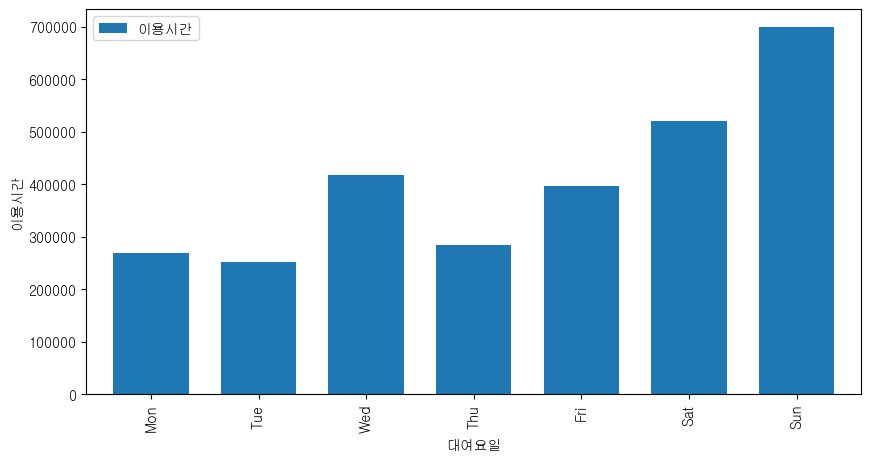

In [227]:
df_week.plot(kind='bar', width=0.7, figsize= (10,5))
plt.ylabel('이용시간')
plt.xlabel('대여요일')
plt.legend(loc='best')
plt.show()